<ipython-input-1-03477e36522f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["hf_score"]= df_clean["hf_score"].astype(float)


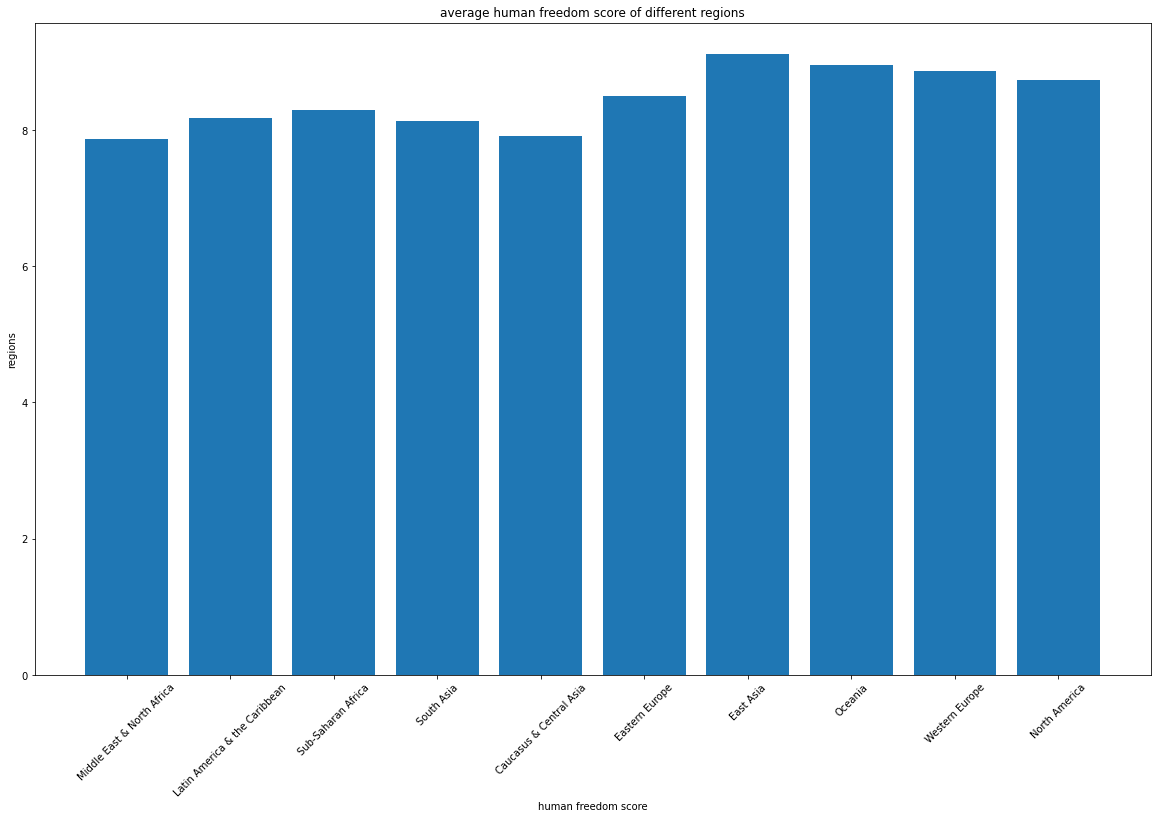

<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
import re
from matplotlib import pyplot as plt
from scipy.stats import bernoulli 
from scipy.stats import binom
import numpy as np


#reading the CSV countaining human freedom data 
df = pd.read_csv("hfi_cc_2019.csv") 
#cheaing the data 
df_clean = df[~df.hf_score.str.contains("-")]
#converting the column hf_score to float 
df_clean["hf_score"]= df_clean["hf_score"].astype(float)

#reading the CSV containg sentiment and analysis 
df2 = pd.read_csv("sentiment_analysis_byRegion.csv") 
df_mean = df2.groupby(["region"]).agg({'score': 'mean'})

df_clean = df_clean.sort_values(by = "hf_score")
plt.figure(figsize=(20,12))

#creating a barchart of average human freedom score of different regions
plt.bar(df_clean["region"], df_clean["hf_score"], alpha =1)
plt.xlabel('human freedom score')
plt.ylabel('regions')
plt.title('average human freedom score of different regions')
plt.xticks(rotation=45)
plt.show()
plt.savefig('hf_freedom for regions')

probability that a country in the middle east has a higher freedom score out of 10 randomly chosen countries is: 0.3235314740166334
probability that less or equal to 50% of the countries in the middle east have a higher freedom score: 0.9999962878298745


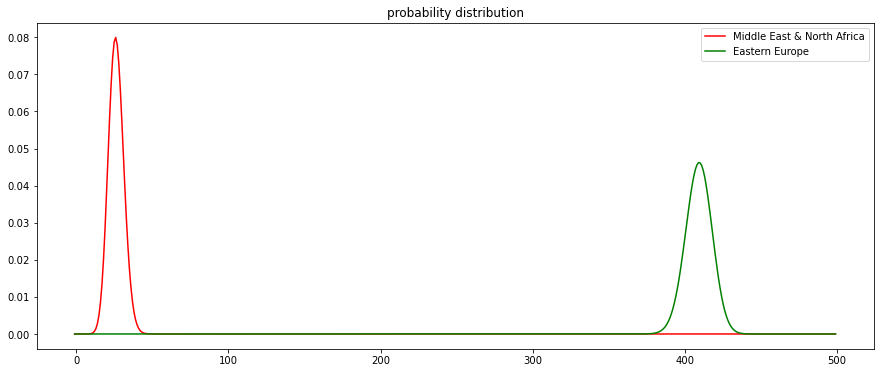

In [8]:
#Here we do probability and Probability Distribution 
df3 = df_clean.loc[df_clean.region.isin(["Middle East & North Africa"])]
df3 = df3.groupby(by = ["countries"]).agg({"hf_score":"mean"})

df4 = df_clean.loc[df_clean.region.isin(["Middle East & North Africa"])]
df4 = df4.groupby(by = ["countries"]).agg({"hf_score":"mean"})
df4 = df4[df4.hf_score > 7]


a = len(df3)
b = len(df4)
#probability that the countries in the middle east and north africa have a higher human freedom score than 7 
p = b/a

df5 = df_clean.loc[df_clean.region.isin(["Eastern Europe"])]
df5 = df5.groupby(by = ["countries"]).agg({"hf_score":"mean"})

df6 = df_clean.loc[df_clean.region.isin(["Eastern Europe"])]

df6 = df6.groupby(by = ["countries"]).agg({"hf_score":"mean"})
df6 = df6[df6.hf_score > 7]


c = len(df5)
d = len(df6)
#probability that the countries in the north europe have a higher human freedom score than 7 
p1 = d/c


n = 10
prob_10 = binom.pmf(1, n, p)
print( "probability that a country in the middle east has a higher freedom score out of 10 randomly chosen countries is:",prob_10)


prob_50 =  binom.cdf(5, n, p) 
print("probability that less or equal to 50% of the countries in the middle east have a higher freedom score:", prob_50)



#creating the probability distribution of the regions " Middle East and North Africa" and Eastern Europe
ni = 500
xs = np.arange(-1,ni,1)
prob_meast =  binom.pmf (xs, ni, p)
prob_neurope =  binom.pmf (xs, ni, p1)
plt.figure(figsize = (15,6))
plt.plot(xs, prob_meast, 'r-', label = "Middle East & North Africa")
plt.plot(xs, prob_neurope, 'g', label = "Eastern Europe")
plt.legend(loc = "best")
plt.title('probability distribution')
plt.savefig("probability.png")


Correlation between economic freedom and sentiment magnitude: -0.059477048831142125


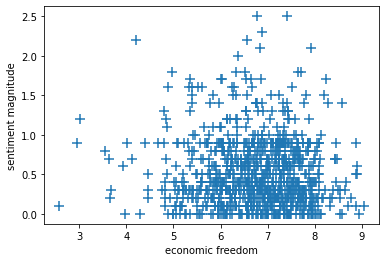

In [3]:
#Here we do the corollation between economic freedom and sentimate 
economics = df_clean["ef_score"].sample(n = len(df2["magnitude"]))
economics = np.array(economics).astype(float)
magnitude = np.array(df2["magnitude"])
print(f"Correlation between economic freedom and sentiment magnitude: {np.corrcoef(economics, magnitude)[0][1]}")


plt.figure(figsize = (6,4))
plt.scatter(economics, magnitude, marker = "+", s = 100)
plt.xlabel("economic freedom")
plt.ylabel("sentiment magnitude")
plt.show
plt.savefig('scatterfig1')


In [4]:
#here we do correlation between human freedom score and the retweet counts
df_retweet = df2.groupby(["region"]).agg({'retweet_count': 'mean'})


df_hfmean = df_clean.groupby(["region"]).agg({'hf_score':'mean'})

retweet = np.array(df_retweet["retweet_count"])
rank = np.array(df_hfmean["hf_score"])
print(f"Correlation of hf_score and retweet count of different region: {np.corrcoef(rank, retweet)[0][1]}")



Correlation of hf_score and retweet count of different region: -0.09864258327573326


<Figure size 720x432 with 0 Axes>

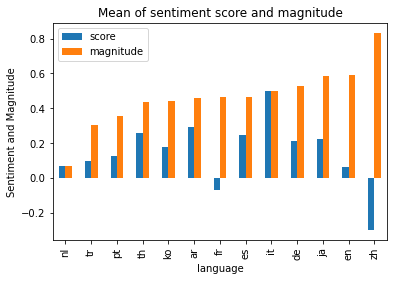

<Figure size 720x432 with 0 Axes>

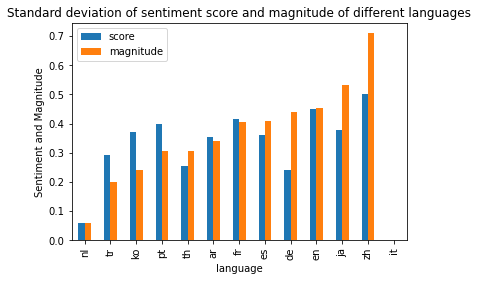

In [5]:
#here we calculate the mean and standard deviation of sentiment score by language
#Calculating the mean of sentiment scores by different languages
aggregation_functions_mean = {"language":"first","score":"mean","magnitude":"mean"}
by_language_mean = df2.groupby(by="language").aggregate(aggregation_functions_mean)
by_language_mean = by_language_mean.sort_values(by="magnitude")


plt.figure(figsize=(10,6))
plt.tight_layout()
by_language_mean.plot.bar(x = "language",y=["score","magnitude"])
plt.title("Mean of sentiment score and magnitude")
plt.ylabel("Sentiment and Magnitude")
plt.show()

#Calculating the standard deviation of sentiment scores by different languages
aggregation_functions_std = {"language":"first","score":"std","magnitude":"std"}
by_language_std = df2.groupby(by="language").aggregate(aggregation_functions_std)
by_language_std = by_language_std.sort_values(by="magnitude")


plt.figure(figsize=(10,6))
plt.tight_layout()
by_language_std.plot.bar(x = "language",y=["score","magnitude"])
plt.title("Standard deviation of sentiment score and magnitude of different languages")
plt.ylabel("Sentiment and Magnitude")
plt.show()


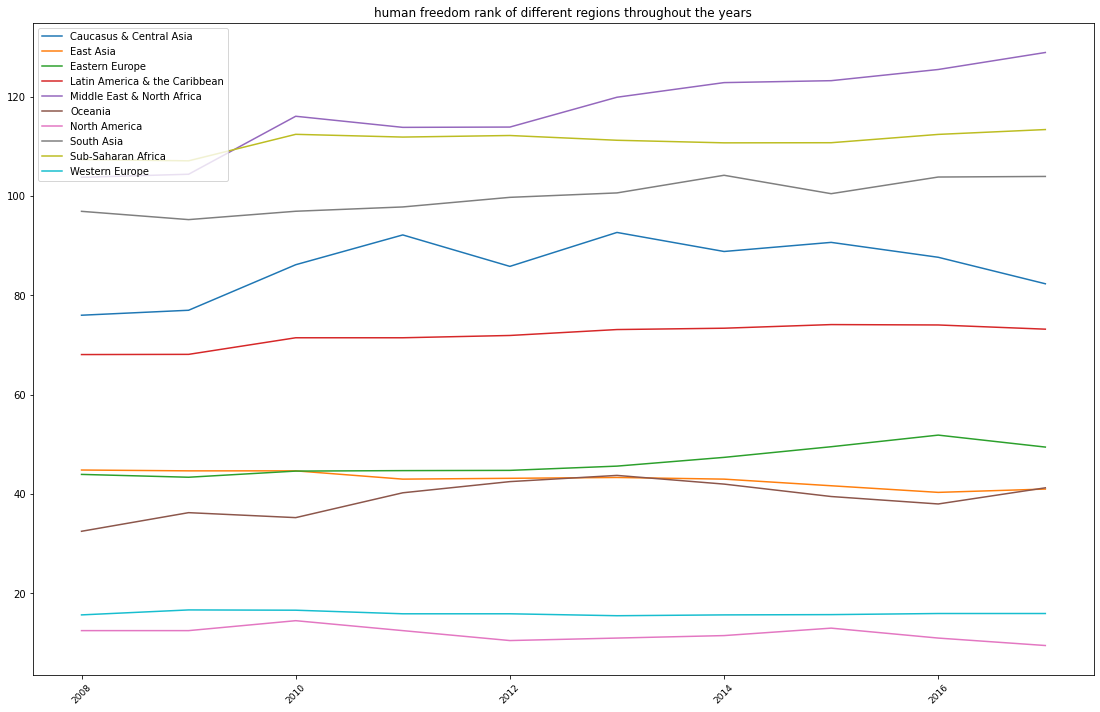

In [6]:
###Here we have the human freedom ranks of different regions throughtout the past 12 years 

df_clean["hf_rank"]= df_clean["hf_rank"].astype(float)

asia = df_clean.loc[ df_clean.region =="Caucasus & Central Asia"]
asia = asia.groupby(by = ["year"]).aggregate({'hf_rank': ['mean']})

easia = df_clean.loc[ df_clean.region =="East Asia"]
easia = easia.groupby(by = ["year"]).aggregate({'hf_rank': ['mean']})
asia
e_europe = df_clean.loc[ df_clean.region =="Eastern Europe"]
e_europe = e_europe.groupby(by = ["year"]).aggregate({'hf_rank': ['mean']})
asia
america = df_clean.loc[ df_clean.region =="Latin America & the Caribbean"]
america = america.groupby(by = ["year"]).aggregate({'hf_rank': ['mean']})
asia
meast = df_clean.loc[ df_clean.region =="Middle East & North Africa"]
meast = meast.groupby(by = ["year"]).aggregate({'hf_rank': ['mean']})
asia
namerica = df_clean.loc[ df_clean.region =="North America"]
namerica = namerica.groupby(by = ["year"]).aggregate({'hf_rank': ['mean']})
asia
ocean = df_clean.loc[ df_clean.region =="Oceania"]
ocean = ocean.groupby(by = ["year"]).aggregate({'hf_rank': ['mean']})


sasia = df_clean.loc[ df_clean.region =="South Asia"]
sasia = sasia.groupby(by = ["year"]).aggregate({'hf_rank': ['mean']})


sasia = df_clean.loc[ df_clean.region =="South Asia"]
sasia = sasia.groupby(by = ["year"]).aggregate({'hf_rank': ['mean']})

safrica = df_clean.loc[ df_clean.region =="Sub-Saharan Africa"]
safrica = safrica.groupby(by = ["year"]).aggregate({'hf_rank': ['mean']})


weurope = df_clean.loc[ df_clean.region =="Western Europe"]
weurope = weurope.groupby(by = ["year"]).aggregate({'hf_rank': ['mean']})



asia.columns = ["hf_rank"]
asia = asia.reset_index()
# demo = demo.sort_values( by = "date", ascending = True)

easia.columns = ["hf_rank"]
easia = easia.reset_index()

e_europe.columns = ["hf_rank"]
e_europe = e_europe.reset_index()

america.columns = ["hf_rank"]
america = america.reset_index()

meast.columns = ["hf_rank"]
meast = meast.reset_index()

namerica.columns = ["hf_rank"]
namerica = namerica.reset_index()

ocean.columns = ["hf_rank"]
ocean = ocean.reset_index()

sasia.columns = ["hf_rank"]
sasia = sasia.reset_index()


safrica.columns = ["hf_rank"]
safrica = safrica.reset_index()

weurope.columns = ["hf_rank"]
weurope = weurope.reset_index()



plt.figure(figsize = (19,12))
plt.plot(asia.loc[:,"year"], asia.loc[:,"hf_rank"], label = "Caucasus & Central Asia")
plt.plot(easia.loc[:,"year"], easia.loc[:,"hf_rank"], label = "East Asia")
plt.plot(e_europe.loc[:,"year"], e_europe.loc[:,"hf_rank"], label = "Eastern Europe")
plt.plot(america.loc[:,"year"], america.loc[:,"hf_rank"], label = "Latin America & the Caribbean")
plt.plot(meast.loc[:,"year"], meast.loc[:,"hf_rank"], label = "Middle East & North Africa")
plt.plot(ocean.loc[:,"year"], ocean.loc[:,"hf_rank"], label = "Oceania")
plt.plot(namerica.loc[:,"year"], namerica.loc[:,"hf_rank"], label = "North America")
plt.plot(sasia.loc[:,"year"], sasia.loc[:,"hf_rank"], label = "South Asia")
plt.plot(safrica.loc[:,"year"], safrica.loc[:,"hf_rank"], label = "Sub-Saharan Africa")
plt.plot(weurope.loc[:,"year"], weurope.loc[:,"hf_rank"], label = "Western Europe")
# plt.plot(repub.loc[:,"date"], repub.loc[:,"tweet_count"], label = "Republican")
# plt.plot(both.loc[:,"date"], both.loc[:,"tweet_count"], label = "Both")
plt.title("human freedom rank of different regions throughout the years")
plt.xticks(fontsize = 9, rotation = 45)
plt.legend(loc = "upper left")
